# Discount Effectiveness
- How discounts impact sales volumns (sales quantity) and revenue.
    - Compare discounts sales/sales volumns and non-discounts sales/sales volumns.
    - Profit margin between discounts and non-discounts by Product Category

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

### Loading data

In [2]:
# Define the connection details
server = 'DESKTOP-D57LVN9\SQLEXPRESS'
database = 'ContosoRetail'
username = 'sa'
password = '281202'

# Create the connection string
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'

# Create the engine
engine = create_engine(connection_string)

# Write SQL query
query = "select * from Discount_Effectiveness"

# Load data into a pandas DataFrame
df_origin = pd.read_sql(query, engine, index_col='ProductName')
 
# No need to explicitly close the engine, but it’s good practice to dispose of it when done
engine.dispose()

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\duyvn\AppData\Local\Temp\ipykernel_7372\915993621.py:2: SyntaxWarning: invalid escape sequence '\S'
  server = 'DESKTOP-D57LVN9\SQLEXPRESS'


### Aggregating Total Profit

In [3]:
df_origin['TotalProfit'] = df_origin['SalesAmount'] - df_origin['TotalCost']
df_origin.head()

,DiscountPct,DiscountTier,DiscountQuantity,DiscountAmount,SalesAmount,SalesQuantity,TotalCost,TotalProfit
ProductName,,,,,,,,
A. Datum Point Shoot Digital Camera M500 Black,0.20,15% - 20%,1,39.600,1544.400,8,728.40,816.000
Contoso Battery charger - bike E200 Black,0.05,0% - 10%,1,0.995,78.605,4,40.60,38.005
Fabrikam Budget Moviemaker 2/3'' 17mm E100 White,0.05,0% - 10%,3,61.500,3628.500,9,1881.27,1747.230
The Phone Company Touch Screen Phones 4-Wire/On-wall M302 Grey,0.20,15% - 20%,1,57.800,2254.200,8,1063.20,1191.000
"Fabrikam SLR Camera 35"" X358 Blue",0.20,15% - 20%,3,261.720,10207.080,24,3468.48,6738.600


### Aggregating Non-Discounts Sales and Discounts Sales
- Top Sales products
- Bottom Sales products

#### Top Sales products

In [4]:
# Non-Discounts Sales
df_non_discounts = df_origin[df_origin['DiscountAmount'] == 0]
df_non_discounts = df_non_discounts.groupby('ProductName')['SalesAmount'].sum().to_frame(name='Non-Discount Sales').sort_values(by='Non-Discount Sales', ascending=False)

# Discounts Sales
df_discounts = df_origin[df_origin['DiscountAmount'] > 0]
df_discounts = df_discounts.groupby('ProductName')['SalesAmount'].sum().to_frame(name='Discounts Sales').sort_values(by='Discounts Sales', ascending=False)

# Merging Non-Discounts and Discounts Sales
df_merge_discounts = df_discounts.merge(df_non_discounts, on='ProductName').sort_values(by='Discounts Sales', ascending=False).head(10)
df_merge_discounts_melt = df_merge_discounts.reset_index().melt(id_vars='ProductName', var_name='Metrics', value_name='Amount')

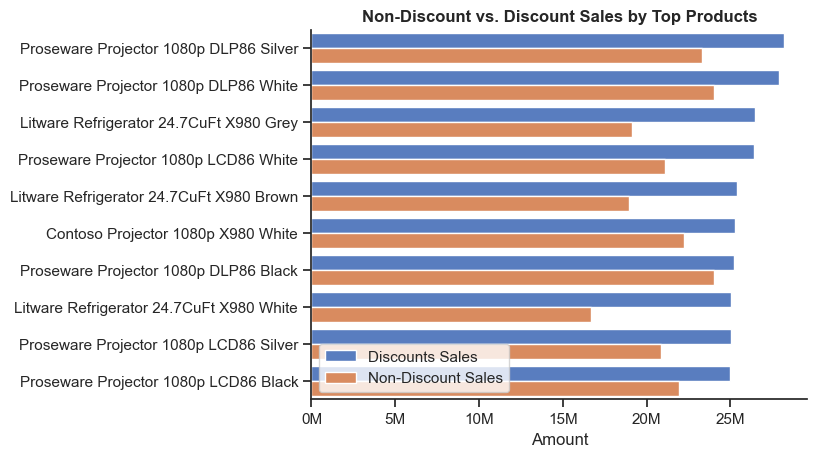

In [5]:
# Plotting
sns.set_theme(style='ticks')
sns.barplot(
    data=df_merge_discounts_melt,
    x='Amount',
    y='ProductName',
    hue='Metrics',
    palette='muted'
)
sns.despine()

# Formatting plot
plt.title('Non-Discount vs. Discount Sales by Top Products', fontsize=12, fontweight='bold')
plt.ylabel('')
plt.legend(title=False, loc='lower left')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000000)}M'))

plt.show()

#### Tail Sales products

In [6]:
# Non-Discounts Sales
df_non_discounts_bot = df_origin[df_origin['DiscountAmount'] == 0]
df_non_discounts_bot = df_non_discounts_bot.groupby('ProductName')['SalesAmount'].sum().to_frame(name='Non-Discount Sales').sort_values(by='Non-Discount Sales', ascending=False)

# Discounts Sales
df_discounts_bot = df_origin[df_origin['DiscountAmount'] > 0]
df_discounts_bot = df_discounts_bot.groupby('ProductName')['SalesAmount'].sum().to_frame(name='Discounts Sales').sort_values(by='Discounts Sales', ascending=False)

# Merging Non-Discounts and Discounts Sales
df_merge_discounts_bot = df_discounts_bot.merge(df_non_discounts, on='ProductName').sort_values(by='Discounts Sales', ascending=False).tail(10)
df_merge_discounts_bot_melt = df_merge_discounts_bot.reset_index().melt(id_vars='ProductName', var_name='Metrics', value_name='Amount')
df_merge_discounts_bot_melt

,ProductName,Metrics,Amount
0,Contoso Digital Camera Accessory kit M200 Blue,Discounts Sales,38850.6450
1,Contoso Smart Battery M901 Blue,Discounts Sales,33831.0450
2,SV USB Sync Charge Cable E700 Black,Discounts Sales,15594.4161
3,SV USB Sync Charge Cable E700 Blue,Discounts Sales,15269.9068
4,SV USB Sync Charge Cable E700 White,Discounts Sales,14854.2157
5,SV USB Sync Charge Cable E700 Silver,Discounts Sales,13993.7198
6,SV USB Data Cable E600 Silver,Discounts Sales,9993.1925
7,SV USB Data Cable E600 Black,Discounts Sales,9078.5895
8,SV USB Data Cable E600 Grey,Discounts Sales,8959.9345
9,SV USB Data Cable E600 Pink,Discounts Sales,8278.0245


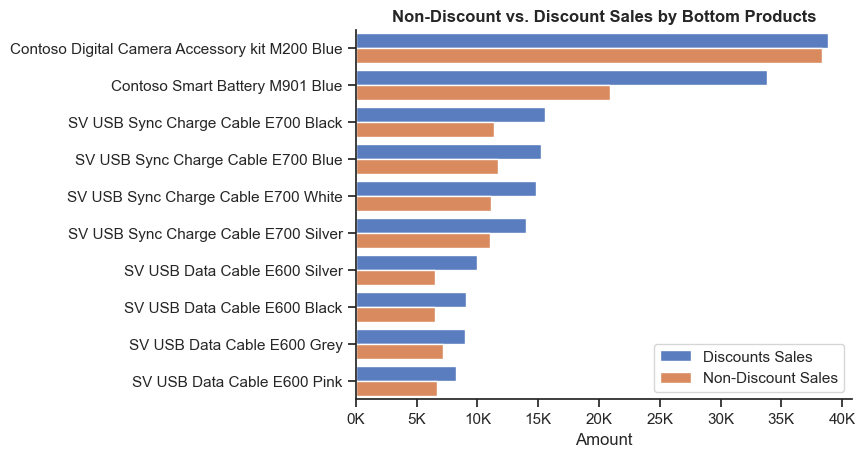

In [7]:
# Plotting
sns.set_theme(style='ticks')
sns.barplot(
    data=df_merge_discounts_bot_melt,
    x='Amount',
    y='ProductName',
    hue='Metrics',
    palette='muted'
)
sns.despine()

# Formatting plot
plt.title('Non-Discount vs. Discount Sales by Bottom Products', fontsize=12, fontweight='bold')
plt.ylabel('')
plt.legend(title=False, loc='lower right')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

plt.show()

### Correlation between discount percentage and revenue.

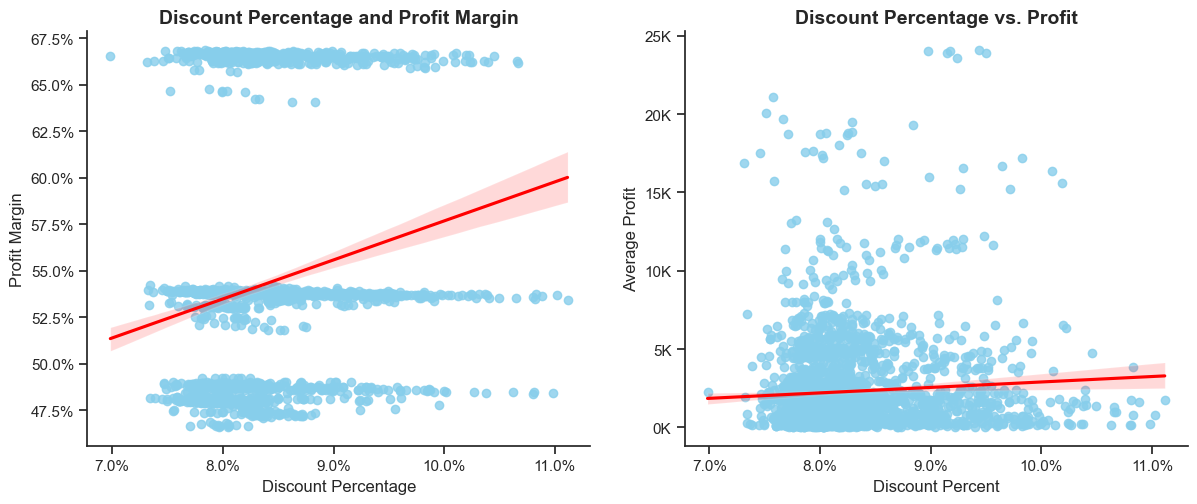

In [32]:
# Extracting data
df_corr_profit_margin = df_origin.reset_index()[['ProductName', 'DiscountPct','TotalProfit','SalesAmount']].copy()
df_corr_profit = df_origin.reset_index()[['ProductName', 'DiscountPct','TotalProfit']].copy()

# Calculate profit margin
df_corr_profit_margin['ProfitMargin'] = (df_corr_profit_margin['TotalProfit'] / df_corr_profit_margin['SalesAmount']) * 100

# Aggregating profit and profit margin
df_corr_profit_margin = df_corr_profit_margin.groupby('ProductName').agg({
    'ProfitMargin': 'mean',
    'DiscountPct': 'mean'})

df_corr_profit = df_corr_profit.groupby('ProductName').agg({
    'TotalProfit': 'mean',
    'DiscountPct': 'mean'})

# Plotting
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.set_theme(style='ticks')

sns.regplot(
    data=df_corr_profit_margin,
    ax=ax[0],
    x='DiscountPct',
    y='ProfitMargin',
    color='skyblue',
    line_kws={'color': 'red'}
)

sns.regplot(
    data=df_corr_profit,
    ax=ax[1],
    x='DiscountPct',
    y='TotalProfit',
    color='skyblue',
    line_kws={'color': 'red'}
)

sns.despine()

fig.tight_layout()

# Formatting plot
ax[0].set_title('Discount Percentage and Profit Margin', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Discount Percentage')
ax[0].set_ylabel('Profit Margin')
ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.1f}%'))
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

ax[1].set_title('Discount Percentage vs. Profit', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Discount Percent')
ax[1].set_ylabel('Average Profit')
ax[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.1f}%'))
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

### Sales Amount vs. Discount Amount

In [45]:
# Extracting data
df_sales_discount = df_origin.reset_index()[['ProductName','SalesAmount','TotalProfit','DiscountAmount']].copy()

In [46]:
df_sales_discount.head()

,ProductName,SalesAmount,TotalProfit,DiscountAmount
0,A. Datum Point Shoot Digital Camera M500 Black,1544.400,816.000,39.600
1,Contoso Battery charger - bike E200 Black,78.605,38.005,0.995
2,Fabrikam Budget Moviemaker 2/3'' 17mm E100 White,3628.500,1747.230,61.500
3,The Phone Company Touch Screen Phones 4-Wire/O...,2254.200,1191.000,57.800
4,"Fabrikam SLR Camera 35"" X358 Blue",10207.080,6738.600,261.720


Text(0, 0.5, 'Sales Amount')

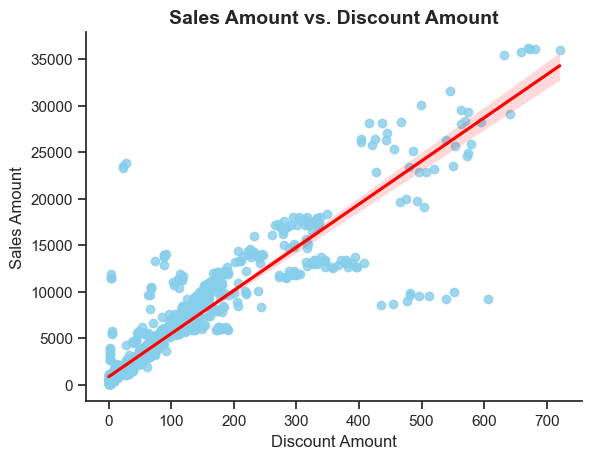

In [51]:
# Calculating
df_sales_discount = df_sales_discount.groupby('ProductName')[['SalesAmount','DiscountAmount']].mean().reset_index()
df_sales_discount

# Plotting
sns.set_theme(style='ticks')
sns.regplot(
    data=df_sales_discount,
    x='DiscountAmount',
    y='SalesAmount',
    color='skyblue',
    line_kws={'color': 'red'}
)
sns.despine()

# Formatting plot
plt.title('Sales Amount vs. Discount Amount', fontsize=14, fontweight='bold')
plt.xlabel('Discount Amount')
plt.ylabel('Sales Amount')